# Week 1 - Probability theory and Statistics review

Hello! Welcome to our course on Model-Based Machine Learning! We hope you will enjoy and learn a lot of new powerful techniques for your future.

As usual in Python, the first thing to do is to import the necessary packages. Let's start with some usual ones for now...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
%matplotlib inline

## Part 1 - Random variables, independence, conditionality, Bayes theorem

In [2]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/utLRF5930y8" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/opt/homebrew/Caskroom/miniconda/base/envs/mbml/lib/python3.9/site-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


We are going to work on a 2D world for now, and a uniform distribution.

So, let's create N 2D points:

In [3]:
N=500
pts=np.random.uniform(size=(N,2)) 

Take a look at these points. You'll notice they all fall inside a [0,1]x[0,1] square...

In [4]:
pts[:10]

array([[0.90434142, 0.78002013],
       [0.85841657, 0.38972794],
       [0.35702136, 0.28898399],
       [0.95168902, 0.09989152],
       [0.20455341, 0.79795359],
       [0.92060805, 0.43533414],
       [0.43657152, 0.60686747],
       [0.68163564, 0.65097807],
       [0.87127652, 0.93043199],
       [0.30028465, 0.66806426]])

Can you count how many such points fall inside a circle centered at (0,0) and radius 1?

In [5]:
def in_circ(x,y):
     return x**2+y**2<1   

In [6]:
inc=sum([in_circ(x,y) for x, y in pts])
print(inc)

391


Consider a={a given point (x,y) falls inside the circle centered at (0,0) with radius 1}

Calculate the probability of a, p(a)

In [7]:
Pa = inc/N
print(Pa)

0.782


Visualizations are often quite useful. Can you visualize both the points as well as the circle line?

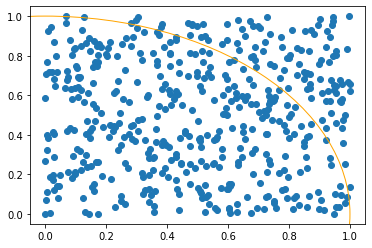

In [16]:
plt.scatter(pts[:,0], pts[:, 1])
c = plt.Circle((0,0), 1, fill=False, color='orange')
plt.gca().add_artist(c)
plt.show()

Just to link with your trigonometrics knowledge: what is the area of this circle (radius=1)? And what is the area of a quarter of that circle (the part that you just drew)?

What is the relationship with that value and the probability that you just calculated (you can vary the number of points, N, to check your theory)?

In [20]:
area = math.pi
print(f'Circle area: {area}')
print(f'A quater of the area: {area/4}')

Circle area: 3.141592653589793
A quater of the area: 0.7853981633974483


Now, let's add a new event b={a point (x,y) falls on the right hand side of the [0,1]x[0,1] square}

Calculate p(b) 

In [31]:
def on_right(x):
    return x > .5

In [34]:
rhs_pts = sum([on_right(x) for x, y in pts])
print(f'Points on right hand side: {rhs_pts}')
Pb = rhs_pts/N
print(f'P(b): {Pb}')

Points on right hand side: 258
P(b): 0.516


So, now you have p(a) and p(b). Do you want to try calculating p(a,b)?

Are they independent? Is there any reason to believe that they aren't?

To check this, try two approaches:

-- p(a,b)=p(a)*p(b)

-- Just count the points that fulfill both a and b constraints (and divide by the total number of points... ;-) ).


In [37]:
# Wrong P(a,b) since they are not independent
independent_Pab = Pa*Pb
print(f'P(a,b)=P(a)*P(b) gives: {independent_Pab}')

P(a,b)=P(a)*P(b) gives: 0.40351200000000004


In [38]:
ab = sum([in_circ(x,y) and on_right(x) for x, y in pts])
print(f'#(a,b): {ab}')
emp_Pab = ab/N
print(f'Emperical P(a,b): {emp_Pab}')

#(a,b): 161
Emperical P(a,b): 0.322


They are different! Why?... If you are in doubt, take a look at the picture...

The probabilities Pa and Pb are dependent since increasing one means decreaseing the other, which can be seen as increasing/decreasing the circle circumference to change both the amount of points inside and outside the circle.

Maybe they are not independent, after all... if so, their joint probability is instead

p(a,b)=p(a|b)*p(b)


Please calculate p(a|b), in order to get the right value...

In [43]:
pts_b = [p for p in pts if on_right(p[0])]
N_a_b = sum([in_circ(x,y) for x,y in pts_b])
Pa_b = N_a_b/len(pts_b)
print(f'P(a|b): {Pa_b}')

P(a|b): 0.624031007751938


Now you calculate p(a,b)=p(a|b)*p(b)

In [44]:
Pab = Pa_b*Pb
print(f'P(a,b): {Pab}')

P(a,b): 0.322


Compare with the values above. Does it make more sense now? 

Another well known property is the Bayes theorem:

$p(b|a)=\frac{p(a|b)p(b)}{p(a)}$

Calculate the p(b|a) using the Bayes theorem, and calculate it directly from data. Are they converging to the same value?


In [45]:
Pb_a = Pa_b*Pb/Pa
print(f'P(b|a): {Pb_a}')

P(b|a): 0.4117647058823529


Look at the following table:

In [46]:
f=pd.DataFrame([[0.068966, 0.137931, 0.068966], [0.344828, 0.241379, 0.137931]], columns=['T=Hot', 'T=Mild', 'T=Cold'], index=['W=Sunny', "W=Cloudy"])
print(f)

             T=Hot    T=Mild    T=Cold
W=Sunny   0.068966  0.137931  0.068966
W=Cloudy  0.344828  0.241379  0.137931


Marginalization allows us to compute distributions over a selection of variables that we want. For example, for the table above, that represents p(W, T) in a non-normalized way, we could "marginalize out weather", i.e. calculate p(T), by doing 

$p(T)=\sum_W p(W, T)$

Marginalize out weather (Hint: the pandas package has a nice "sum()" function associated with the the DataFrame object f that you can use...)

In [ ]:
f.sum(axis=0)

T=Hot     0.413794
T=Mild    0.379310
T=Cold    0.206897
dtype: float64

Marginalize out temperature

In [47]:
f.sum(axis=1)

W=Sunny     0.275863
W=Cloudy    0.724138
dtype: float64

--------

## Part 2 - Independence

In [1]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/q7LyCOfn7WM" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Let's get further into the concept of **independence**

To begin with, let's create a small dataset of size N. We will start with two random variables, z and t, both uniformly distributed. 

Each random variable will be an integer value in {0, 1, 2} (you can change this later, of course). 

In [ ]:
N=1000
D=3

z=np.random.randint(D, size=N)
t=np.random.randint(D, size=N)

Let's calculate the probability of each different value of z. Take a look at this code. It may be useful later

In [ ]:
z_items, z_counts=np.unique(z, return_counts=True, axis=0) #returns a list of different items in Z; it also counts how 
                                                           #many times each one appears

#calculates the p(Z=z), for each possible value of z
for item, ct in zip(z_items, z_counts):     
    print("p(z=%d)=%f"%(item, ct/N))

p(z=0)=0.352000
p(z=1)=0.337000
p(z=2)=0.311000


Actually, we're going to reuse the above code quite a lot. Let's make a new function, then... 

In [ ]:
#Function p. It receives a list of values, K, and simply prints the probability of each of its values
#nam and given - Two strings just for printing. Just run this once and you'll see... ;-)
def p(nam, K, given=""):    
    k_items, k_counts=np.unique(K, return_counts=True, axis=0)
    for item, ct in zip(k_items, k_counts):
        print("p(%s=%s%s)=%f"%(nam, item, given, ct/sum(k_counts)))

Let's try it with our variables Z and T

In [ ]:
p('z', z)
p('t', t)

p(z=0)=0.352000
p(z=1)=0.337000
p(z=2)=0.311000
p(t=0)=0.329000
p(t=1)=0.332000
p(t=2)=0.339000


ok. So, we have the probability of each value, according to this dataset. 

Assuming that both z and t are uniformly distributed, the calculation for the probability of each should be trivial, right? What is it?

Does it match the above? If you're in doubt, you can increase the value of N, the dataset size. As N grows, it should approximate your calculation... 

Let's now think of the joint distribution of z and t. In other words, how these two variables seem to co-vary, together. The first thing to do is to "align" them, i.e., re-create a new random variable (z_t), that is a pair of observations, z and t. 

In [ ]:
z_t=np.stack((z,t), axis=-1)  #Check the result of this operation, to understand what it does...

So, let's use the function above, to calculate the join distribution

In [ ]:
p("z,t", z_t)

p(z,t=[0 0])=0.123000
p(z,t=[0 1])=0.119000
p(z,t=[0 2])=0.110000
p(z,t=[1 0])=0.114000
p(z,t=[1 1])=0.106000
p(z,t=[1 2])=0.117000
p(z,t=[2 0])=0.092000
p(z,t=[2 1])=0.107000
p(z,t=[2 2])=0.112000


Are Z and T independent? If yes, the formula for their join distribution is trivial. Please calculate it (and check if it verifies).

Let's create two more variables, both based on Z. 

In [ ]:
betay=-2    
betax=1
y=betay*z
x=betax*z

Are they independent? What do you think? A good way to see is by plotting... do you want to do it?

What should it look like when variables are independent? And when they are correlated?

Let's check their joint distribution, then... 

In [ ]:
x_y=np.stack((x,y), axis=-1)
p("x,y", x_y)

p(x,y=[0 0])=0.352000
p(x,y=[ 1 -2])=0.337000
p(x,y=[ 2 -4])=0.311000


Notice that, for all other value combinations (e.g. x,y=[0,-2]), the probability is zero.

If x and y are independent, then the product of their marginal probabilities should be equal to the values above, right? Do you want to calculate?

Should the values match at all? Let's try instead to calculate the conditional probabilities, of and x and y, given z.

To do it, directly on the data, we need to calculate, for EACH value of z, the distributions for both x and y.

This means that we need to organize the data accordingly. How about using a dictionary? 

In [ ]:
from collections import defaultdict

z_dict=defaultdict(list)

for X, Y, Z in zip(x, y, z):
    z_dict[Z].append([X,Y])
    

To make sure you understand the code above, don't forget to check z_dict carefully...

The code below uses the dictionary to calculate the conditional marginal and joint distributions. Check it carefully.

In [ ]:
for Z in z_dict:
    x_y=z_dict[Z]
    x=np.array(x_y)[:,0]
    y=np.array(x_y)[:,1]  
    p("x", x, "|z=%d"%Z)
    p("y", y,"|z=%d"%Z)
    p("x,y", x_y, "|z=%d"%Z)

p(x=1|z=1)=1.000000
p(y=-2|z=1)=1.000000
p(x,y=[ 1 -2]|z=1)=1.000000
p(x=0|z=0)=1.000000
p(y=0|z=0)=1.000000
p(x,y=[0 0]|z=0)=1.000000
p(x=2|z=2)=1.000000
p(y=-4|z=2)=1.000000
p(x,y=[ 2 -4]|z=2)=1.000000


So, what do you conclude? Is it true that x is independent of y given z?

The example above was particularly odd, because there is NO randomness involved (i.e. x is **exactly** betax times z). As a consequence, the probabilities are quite extreme. 

Try to redo the whole exercise, by adding a little randomness to x and y (don't forget to keep them as integers). Notice how the conditional independence property varies of "intensity", as you add more or less randomness... 

Finally, let's try a different perspective on conditional independence: why does it actually matter??

Particularly, we want to understand the meaning of the following sentence:

**"If we know z, then knowing about y tells us nothing about x"**



Using your small dataset (x, y, z), you will try to make linear regression prediction models. Our goal is to "know about x", i.e. x will be the target (or dependent) variable in our linear regression. 

Compare the following models (e.g. using sklearn's LinearRegression model):

- $x=\beta_1*z$
- $x=\beta_1*y+\beta_2*z$
- $x=\beta_1*y$

Notice the coefficients, what do they mean?

--------

## Part 3 - Expectation of discrete variables

In [2]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/M5_r1VnWDtY" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Calculate the expected value of x, using

$E(x)=\sum_x xp(x)$

Compare it with the mean of x (x.mean() )

-------

## Part 4 - Well-known probability distributions

In [3]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/VfC642Tmtp0" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In this lecture, we talk about a few probability density functions. Let's define them. Take a careful look at the expressions, and the parameters.

In [ ]:
def normpdf(x, mu, sigma):
    return 1/(math.sqrt(2*math.pi)*sigma)*math.exp(-1.0/2*(mu-x)**2/(sigma**2))
def poispdf(x, lamb):
    return lamb**x*math.exp(-lamb)/math.factorial(x)
def exppdf(x, lamb):
    return lamb*math.exp(-lamb*x)
def betapdf(x, Alpha, Beta):
    Bx=scipy.special.beta(Alpha, Beta)
    return x**(Alpha-1)*(1-x)**(Beta-1)/Bx

Notice that these function exists in many other Python packages, you don't need to redefine them all the time...

It's very useful to plot them, as we do below (this is the code used to generate the pictures in the slides)

First, the **Gaussian**

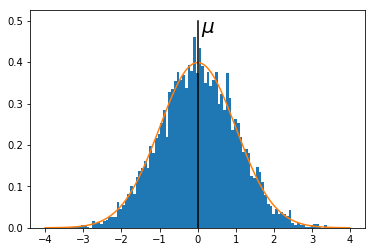

In [ ]:
X=np.arange(-4, 4, 0.01)
L=np.random.normal(size=5000)
mu=0
sigma=1
Y=np.array([normpdf(x, mu, sigma) for x in X])
plt.hist(L, bins=100, density=True)
plt.plot(X,Y)
plt.plot([mu, mu], [0,.5], c="black")
plt.annotate(s="$\mu$",xy=(mu+.1,.47), size=20);

Now, the **Poisson** . Remember that it is a discrete probability distribution (the x axis has to be discrete numbers - any ). 

Try to use the parameters "bins=..." in the plt.hist call, to see this influence of different bin sizes in the shape of the histogram. 



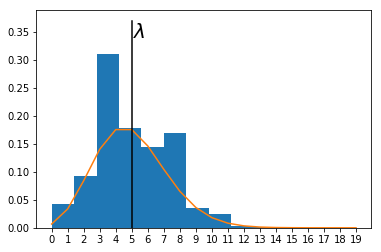

In [ ]:
X=range(0,20)
lamb=5
L=np.random.poisson(lamb, size=5000)
Y=np.array([poispdf(x, lamb) for x in X])
weights = np.ones_like(L)/float(len(L))
plt.hist(L,weights=weights)
plt.plot(X,Y);
plt.plot([lamb, lamb], [0,.37], c="black")
plt.xticks(X)
plt.annotate(s="$\lambda$",xy=(lamb+.1,.34), size=20);

Let's try the **exponential**

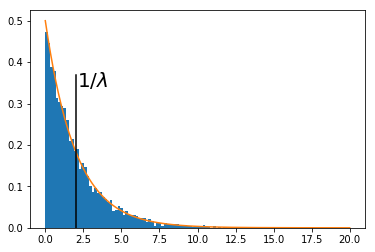

In [ ]:
X=np.arange(0,20, 0.01)
lamb=.5
L=np.random.exponential(1/lamb, size=5000)
Y=np.array([exppdf(x, lamb) for x in X])
plt.hist(L, bins=100, density=True)
plt.plot(X,Y);
plt.plot([1/lamb, 1/lamb], [0,.37], c="black")
plt.annotate(s="$1/\lambda$",xy=(1/lamb+.1,.34), size=20);

And finally, the **Beta**

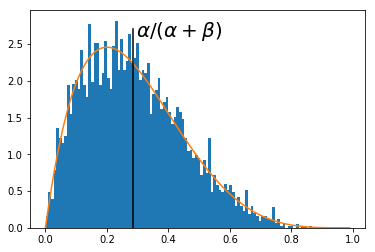

In [ ]:
X=np.arange(0,1, 0.01)
Alpha=2
Beta=5
L=np.random.beta(Alpha, Beta, size=5000)
Y=np.array([betapdf(x, Alpha, Beta) for x in X])
plt.hist(L, bins=100, density=True)
plt.plot(X,Y);#
m=Alpha/(Alpha+Beta)
plt.plot([m, m], [0,2.7], c="black")
plt.annotate(s="$\\alpha/(\\alpha+\\beta)$",xy=(m+.01,2.6), size=20);

**The Central limit theorem**

A very important theorem in all statistics is called the Central Limit Theorem, which says that 

> The distribution of the sampling means approaches a normal distribution as the sample size gets larger — no matter what the shape of the population distribution.

Try to test yourself the Central Limit Theorem. Essentially, generate multiple random datasets, each time following the same parameters, and a probability density function (pdf) of your choice. Test with each of the pdfs created above. 

We will now work with bivariate distributions, i.e. instead of having one value at a time, we have two. 

Let's use the Bivariate normal distribution for it

In [ ]:
X=np.random.multivariate_normal([0,0], [[1,.6],[.6, 1]], size=5000)

Let's check the second parameter (in this case, the list [[1,.6],[.6, 1]]). It corresponds to the covariance matrix of the normal distribution. 

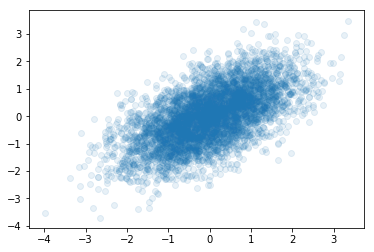

In [ ]:
plt.scatter(X[:,0], X[:,1], alpha=0.1)

Try changing the values of that matrix, and see the results...

Just to make sure you don't make mistakes in the future, notice that the code below is ONLY for a covariance matrix of independent normal variables. 

In [ ]:
X=np.random.normal(loc=0, scale=1, size=[5000,2])

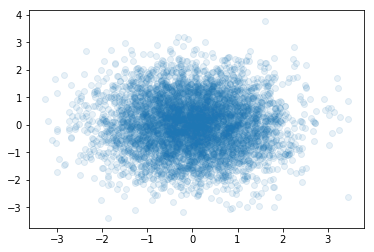

In [ ]:
plt.scatter(X[:,0], X[:,1], alpha=0.1)

Just to make sure you got it, sample from an equivalent (independent) gaussian, now with the np.random.multivariate_normal function mentioned above.

----

## Part 5 - Maximum likelihood estimation

In [4]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/RsqUVCmYk94" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Time now to work on the concept of maximum loglikelihood, a fundamental one in statistical modeling. 

Let's create a dataset...

In [ ]:
P=np.random.normal(loc=4.5, scale=3, size=1000)

Now, let's follow the slides, and create the function that returns the Gaussian loglikelihood of a dataset, given a pair of parameters:

$-\frac{n}{2} (log(2\pi)+log(\sigma^2) -\frac{1}{2\sigma^2}\sum_i (x_i-\mu)^2$

Confirm that the function has no mistake...

In [ ]:
def loglikelihood(P, mu, sigma):
    n=len(P)
    s=sum([(xi-mu)**2 for xi in P])
    return -n/2*(math.log(2*math.pi)+math.log(sigma**2))-1/(2*sigma**2)*s

So, we want to find the values of $\mu$ and $\sigma$ that maximize that function in our dataset... Do you want to try to find them? 

A simple way is to try MANY such values (e.g. a range of possible values). Go ahead!

Compare the values you obtained with the sample mean and sample variance.

As mentioned in the lecture, this task falls in the realm of Optimization. Python also has tools for optimizing a function, which is much more clever than blindly trying many values for $\mu$ and $\sigma$. We will not explore them here, but in case you're curious, just try the methods in:
> scipy.optimize

Now, just for illustration, let's try a case where the data comes from a combination (a _mixture_) of two different distributions.

In [ ]:
L1=np.random.normal(loc=4.5, scale=3, size=1000)
L2=np.random.normal(loc=-5, scale=2, size=1000)
L=np.concatenate((L1,L2))

Plot the respective histogram...

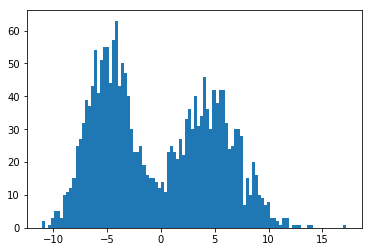

In [ ]:
plt.hist(L, bins=100);

Just getting the mean and standard deviation, assuming a single Gaussian would be mistake... check it yourself!

Plot the distribution you estimated on top of the histogram, just to see the difference